# Laboratorio 6 - Analisis de Redes Sociales
# Introduccion

## Problema 1
Extraiga los datos relacionados con los temblores en Guatemala, puede utilizar cualquier red social, <br>
a la que se tenga acceso, y pueden extraerse datos de varias. Por ejemplo si extrae datos de twitter <br>
podría utilizar el hashtag #temblorgt <br>
* Explore  los  datos  que  extraiga  y  descubra  conocimiento, tendencias y elementos interesantes.

## Problema 2
Extraiga los datos relacionados con el  tráfico en la  ciudad de Guatemala, puede utilizar cualquier <br>
red social, a la que se tenga acceso, y pueden extraerse datos de varias. Por ejemplo si extrae datos <br>
de twitter podría utilizar los hashtag #TraficoGTo #TransitoGT <br>
* Explore los datos que extraiga y descubra conocimiento, tendencias y elementos interesantes. 


## Problema 3
Extraiga  los  datos de las redes  sociales de  una  empresa,  una  campaña de  marketing de  una <br>
empresa o el lanzamiento  de  un  producto. <br>
Agregue  la  descripción de  la  empresa,  campaña o producto y analice las interacciones de los clientes <br>
con ellos, determine el éxito de la campaña,  producto o empresa en las interacciones de los clientes<br>


###Empresa
Se estudiara el desempeño para transmitir y el impacto que tiene Leag Of Leagends internacionalmente con el  #Worlds2018, ya que estan a punto de tener la final.<br>
ya que estan a punto de entrar a la final del campeonato 2018

# Configuraciones Iniciales

In [5]:
!pip install twitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk import ngrams
# Load library
from nltk.corpus import stopwords
import os
# You will have to download the set of stop words the first time
import nltk
import operator 
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Solucion problema 1

## Descarga de Informacion de Twitter

In [0]:
from twitter import Twitter, OAuth                                                                                                                                                                                                         

ACCESS_TOKEN = '339324943-grMlvtueGSOgmP4L1ycn0HylyfAtfYkqOlbNmpsz'
ACCESS_SECRET = 'i2LECt5Gfl8oTyGxgwjYyVdxLMbHk1Qqj6wrSulK28KQf'
CONSUMER_KEY = 'xmdPRdhFjTEmYGvL8nCNe18bv'
CONSUMER_SECRET = 'BW2o4ndwdPE9KecS8YpQe5kSSJmIIe77ZqifYcDW7VLxrfjYtV'

oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
t = Twitter(auth=oauth)


In [7]:
query = t.search.tweets(q='%23temblorgt')

for s in query['statuses']:
    print(s['created_at'], s['text'], '\n')

Sat Oct 27 14:30:23 +0000 2018 🚨 Efemérides #TemblorGT 39 Años
27/10/1979 — Magnitud: 6.8, Profundidad: 58km; #Guatemala
🔍 https://t.co/rmrwx3Nwxt 

Sat Oct 27 13:00:26 +0000 2018 🚨 Efemérides #TemblorGT 39 Años
27/10/1979 — Magnitud: 6.6, Profundidad: 65km; #Guatemala
🔍 https://t.co/f1UxyyNAL2 

Sat Oct 27 06:14:24 +0000 2018 #Temblorgt ? 

Fri Oct 26 23:43:06 +0000 2018 RT @prensa_libre: #TemblorGT | Actualización. Sismo fue de magnitud 4.2 con epicentro a 250.4 km dirección Este-Noreste de Izabal. https://… 

Fri Oct 26 22:56:49 +0000 2018 🇬🇹➡#Temblor 4.1⚡ ⏱15:57 Pm H/Guatemala🇬🇹
🔶#Champerico a 136 Km al SurOeste 
D. de #Retalhuleu
#Guatemala🇬🇹… https://t.co/garXf3eseo 

Fri Oct 26 22:24:07 +0000 2018 RT @prensa_libre: #TemblorGT | Actualización. Sismo fue de magnitud 4.2 con epicentro a 250.4 km dirección Este-Noreste de Izabal. https://… 

Fri Oct 26 19:18:43 +0000 2018 #TemblorGT | Actualización. Sismo fue de magnitud 4.2 con epicentro a 250.4 km dirección Este-Noreste de Izabal.

## Limpieza de datos


#### Volviendo Todo en Minuscula

In [0]:
for s in query['statuses']:
  s['text'] = s['text'].lower()

#### Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.

In [0]:
for s in query['statuses']:
  s['text'] = re.sub(r"@", "", s['text'])
  s['text'] = re.sub(r"#", "", s['text'])  
  s['text'] = re.sub(r"\'", "", s['text'])  
  s['text'] = re.sub(r"—", "", s['text'])
  s['text'] = re.sub(r'🚨',"",s['text'])
  s['text'] = re.sub(r'🔍',"",s['text'])  

#### Quitar las url

In [0]:
for s in query['statuses']:
  s['text'] = re.sub(r"(http|ftp|https)[:A-Za-z//.0-9_]*$", "", s['text']) 

#### Quitando Stopwords

In [0]:
for s in query['statuses']:
#   s['text'] = s['text'].split()
  s['text'] = ' '.join([word for word in s['text'].split() if word not in stop_words])

# query['statuses'] = query['statuses'].split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop_words))
# dataset['reviewtext'] = dataset['reviewtext'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop_words))

In [12]:
for s in query['statuses']:
  print(s['text'])

efemérides temblorgt 39 años 27/10/1979 magnitud: 6.8, profundidad: 58km; guatemala
efemérides temblorgt 39 años 27/10/1979 magnitud: 6.6, profundidad: 65km; guatemala
temblorgt ?
rt prensa_libre: temblorgt | actualización. sismo magnitud 4.2 epicentro 250.4 km dirección este-noreste izabal. https://…
🇬🇹➡temblor 4.1⚡ ⏱15:57 pm h/guatemala🇬🇹 🔶champerico 136 km suroeste d. retalhuleu guatemala🇬🇹…
rt prensa_libre: temblorgt | actualización. sismo magnitud 4.2 epicentro 250.4 km dirección este-noreste izabal. https://…
temblorgt | actualización. sismo magnitud 4.2 epicentro 250.4 km dirección este-noreste izabal.
12:24 horas registró temblorgt magnitud 4.2 epicentro 250.4 kilómetros dirección este-nore…
rt prensa_libre: temblorgt | sismo epicentro 11 kilómetros suroeste puerto barrios magnitud 4.1 registró 12:…
rt prensa_libre: temblorgt | sismo epicentro 11 kilómetros suroeste puerto barrios magnitud 4.1 registró 12:…
rt prensa_libre: temblorgt | sismo epicentro 11 kilómetros suroeste pue

## Descubriendo Informacion
Se crea un diccionario con las palabras utilizadas y se van contando cuantas veces se repiten <br>

#### Diccionario

In [0]:
palabrasMasComunes = {}

In [0]:
def word_count(str, dictionary):
  for word in str.split():
    if word in dictionary:
      dictionary[word] += 1
    else:
      dictionary[word] = 1
  return dictionary

In [0]:
for s in query['statuses']:
  palabrasMasComunes = word_count(s['text'], palabrasMasComunes)

In [0]:
# for palabra in palabrasMasComunes:
  

#### Palabras mas Comunes

In [16]:
for key in palabrasMasComunes:
    print ("%s: %s" % (key, palabrasMasComunes[key]))

efemérides: 2
temblorgt: 14
39: 2
años: 2
27/10/1979: 2
magnitud:: 2
6.8,: 1
profundidad:: 2
58km;: 1
guatemala: 3
6.6,: 1
65km;: 1
?: 1
rt: 7
prensa_libre:: 6
|: 8
actualización.: 3
sismo: 8
magnitud: 9
4.2: 4
epicentro: 9
250.4: 4
km: 4
dirección: 4
este-noreste: 3
izabal.: 3
https://…: 2
🇬🇹➡temblor: 1
4.1⚡: 1
⏱15:57: 1
pm: 1
h/guatemala🇬🇹: 1
🔶champerico: 1
136: 1
suroeste: 6
d.: 1
retalhuleu: 1
guatemala🇬🇹…: 1
12:24: 1
horas: 1
registró: 6
kilómetros: 6
este-nore…: 1
11: 5
puerto: 5
barrios: 5
4.1: 5
12:…: 4
l…: 1
ve!: 1
nadie: 1
dice: 1
3:55.: 1
carolitacar1491:: 1
señor: 1
sigue: 1
acosando: 1
ayuda: 1


#### Ordenamos la lista de mayor a menor

In [0]:
def keyInOrder(listName, number):
  keys = list(sorted(listName, key=listName.__getitem__, reverse=True))
  keys = keys[:number]
  firstFew = {x:listName[x] for x in keys}
  return firstFew

In [0]:
palabrasOrdenadas = {}

In [0]:
for key, value in sorted(palabrasMasComunes.items(), key=operator.itemgetter(1), reverse=True):
  palabrasOrdenadas[key] = int(value)

In [20]:
# sorted(palabrasMasComunes.items(), key=operator.itemgetter(1), reverse=True)
print(palabrasOrdenadas)

{'temblorgt': 14, 'magnitud': 9, 'epicentro': 9, '|': 8, 'sismo': 8, 'rt': 7, 'prensa_libre:': 6, 'suroeste': 6, 'registró': 6, 'kilómetros': 6, '11': 5, 'puerto': 5, 'barrios': 5, '4.1': 5, '4.2': 4, '250.4': 4, 'km': 4, 'dirección': 4, '12:…': 4, 'guatemala': 3, 'actualización.': 3, 'este-noreste': 3, 'izabal.': 3, 'efemérides': 2, '39': 2, 'años': 2, '27/10/1979': 2, 'magnitud:': 2, 'profundidad:': 2, 'https://…': 2, '6.8,': 1, '58km;': 1, '6.6,': 1, '65km;': 1, '?': 1, '🇬🇹➡temblor': 1, '4.1⚡': 1, '⏱15:57': 1, 'pm': 1, 'h/guatemala🇬🇹': 1, '🔶champerico': 1, '136': 1, 'd.': 1, 'retalhuleu': 1, 'guatemala🇬🇹…': 1, '12:24': 1, 'horas': 1, 'este-nore…': 1, 'l…': 1, 've!': 1, 'nadie': 1, 'dice': 1, '3:55.': 1, 'carolitacar1491:': 1, 'señor': 1, 'sigue': 1, 'acosando': 1, 'ayuda': 1}


In [0]:
keys = keyInOrder(palabrasOrdenadas, 10)

In [22]:
print (keys)

{'temblorgt': 14, 'magnitud': 9, 'epicentro': 9, '|': 8, 'sismo': 8, 'rt': 7, 'prensa_libre:': 6, 'suroeste': 6, 'registró': 6, 'kilómetros': 6}


#### Representacion en Graficas

Text(0.5,1,'Palabras Mas Comunes')

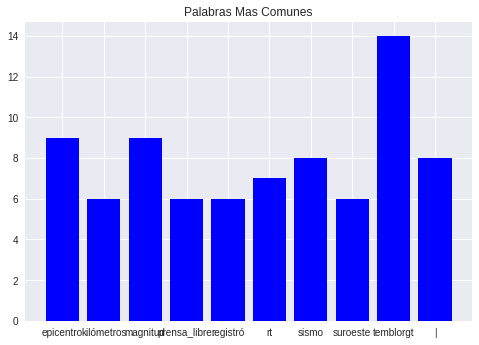

In [23]:
plt.bar(keys.keys(), keys.values(), color='b')
plt.title("Palabras Mas Comunes")

## Conclusiones Problema 1

Viendo las palabras mas comunes: **temblorgt**, **guatemala**, **efemérides**, **años**, **magnitud** <br>
Podemos decir que las emociones de los que estan escribiendo son negativas y preocupantes, informatica

# Solucion problema 2


## Descarga de Informacion de Twitter
Se va a buscar twitts que tengan los hashtags #TraficoGTo y #TransitoGT

In [0]:
##TraficoGTo #TransitoGT
query1 = t.search.tweets(q='%23PrecaucionGT')
query2 = t.search.tweets(q='%23TransitoGT')

In [25]:

for s1 in query1['statuses']:
    print(s1['created_at'], s1['text'], '\n')
    

Sun Oct 28 00:22:26 +0000 2018 RT @amilcarmontejo: #PrecaucionGT por carro averiado en Viaducto Villa Linda, sobre Periférico sur 17 calle zona 7.

Informa Eduardo Mó que… 

Sat Oct 27 23:22:02 +0000 2018 RT @amilcarmontejo: #PrecaucionGT por carro averiado en Viaducto Villa Linda, sobre Periférico sur 17 calle zona 7.

Informa Eduardo Mó que… 

Sat Oct 27 23:14:49 +0000 2018 #PrecaucionGT por carro averiado en Viaducto Villa Linda, sobre Periférico sur 17 calle zona 7.

Informa Eduardo Mó… https://t.co/dXYLjjeCFi 

Wed Oct 24 14:51:07 +0000 2018 RT @amilcarmontejo: #PrecaucionGT por diesel derramado en tramo de 10 avenida, desde Calle Martí a 4 calle Barrio Moderno zona 2.

Douglas… 

Wed Oct 24 13:42:58 +0000 2018 RT @amilcarmontejo: #PrecaucionGT por diesel derramado en tramo de 10 avenida, desde Calle Martí a 4 calle Barrio Moderno zona 2.

Douglas… 

Wed Oct 24 13:22:44 +0000 2018 RT @amilcarmontejo: #PrecaucionGT por diesel derramado en tramo de 10 avenida, desde Calle Martí a 4 

In [26]:

for s2 in query2['statuses']:
    print(s2['created_at'], s2['text'], '\n')

Sun Oct 28 01:34:00 +0000 2018 Accidente #transitogt en 6Calle Barrio El Jardín #Coatepeque, #Quetzaltenango, motoristas atropellados, socorristas… https://t.co/IXlFkeep1p 

Sun Oct 28 01:19:07 +0000 2018 #SurOccidenteGT

Accidente #transitogt en 6Calle Barrio El Jardín #Coatepeque, #Quetzaltenango, motoristas atropell… https://t.co/XyEOEXTwX3 

Sun Oct 28 00:58:11 +0000 2018 RT @amilcarmontejo: MARIO ROBERTO ECUTE MONTENEGRO se le informa que varios documentos a su nombre y hasta dinero en efectivo, fueron encon… 

Sun Oct 28 00:42:50 +0000 2018 RT @amilcarmontejo: MARIO ROBERTO ECUTE MONTENEGRO se le informa que varios documentos a su nombre y hasta dinero en efectivo, fueron encon… 

Sun Oct 28 00:22:26 +0000 2018 RT @amilcarmontejo: #PrecaucionGT por carro averiado en Viaducto Villa Linda, sobre Periférico sur 17 calle zona 7.

Informa Eduardo Mó que… 

Sat Oct 27 23:58:16 +0000 2018 RT @amilcarmontejo: MARIO ROBERTO ECUTE MONTENEGRO se le informa que varios documentos a su nombre 

## Limpieza de datos


#### Volviendo Todo en Minuscula

In [0]:
for s1 in query1['statuses']:
  s1['text'] = s1['text'].lower()
  
for s2 in query2['statuses']:
  s2['text'] = s2['text'].lower()

#### Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.

In [0]:
for s1 in query1['statuses']:
  s1['text'] = re.sub(r"@", "", s1['text'])
  s1['text'] = re.sub(r"#", "", s1['text'])  
  s1['text'] = re.sub(r"\'", "", s1['text'])
  s1['text'] = re.sub(r"rt", "", s1['text'])
  
  
for s2 in query2['statuses']:
  s2['text'] = re.sub(r"@", "", s2['text'])
  s2['text'] = re.sub(r"#", "", s2['text'])  
  s2['text'] = re.sub(r"\'", "", s2['text'])
  s2['text'] = re.sub(r"rt", "", s2['text'])

#### Quitar las url

In [0]:
for s1 in query1['statuses']:
  s1['text'] = re.sub(r"(http|ftp|https)[:A-Za-z//.0-9_]*$", "", s1['text']) 
  
for s2 in query2['statuses']:
  s2['text'] = re.sub(r"(http|ftp|https)[:A-Za-z//.0-9_]*$", "", s2['text']) 

#### Quitando Stopwords

In [0]:
for s1 in query1['statuses']:
  s1['text'] = ' '.join([word for word in s1['text'].split() if word not in stopwords.words('spanish')])
  
for s2 in query2['statuses']:
  s2['text'] = ' '.join([word for word in s2['text'].split() if word not in stopwords.words('spanish')])

## Descubriendo Informacion
Se crea un diccionario con las palabras utilizadas y se van contando cuantas veces se repiten <br>

#### Diccionario

In [0]:
palabrasMasComunes1 = {}
palabrasMasComunes2 = {}

In [0]:
for s1 in query1['statuses']:
  palabrasMasComunes1 = word_count(s1['text'], palabrasMasComunes1)

for s2 in query2['statuses']:
  palabrasMasComunes2 = word_count(s2['text'], palabrasMasComunes2)


#### Palabras mas Comunes

In [115]:
for key in palabrasMasComunes1:
    print ("%s: %s" % (key, palabrasMasComunes1[key]))

amilcarmontejo:: 12
precauciongt: 14
carro: 3
averiado: 3
viaducto: 3
villa: 3
linda,: 3
periférico: 3
sur: 3
17: 3
calle: 24
zona: 14
7.: 3
informa: 3
eduardo: 3
mó: 2
que…: 2
mó…: 1
diesel: 10
derramado: 10
tramo: 10
10: 10
avenida,: 10
maí: 10
4: 10
barrio: 10
moderno: 10
2.: 10
douglas…: 8
doug…: 1
|: 1
vehículo: 1
neumático: 1
pinchado: 1
35: 1
11: 1
avenida: 1
colonia: 1
charcas: 1
11.: 1
afecta: 1
transitogt…: 1
medios: 1
informan: 1
maes: 1
23: 1
octubre: 1
2018,: 1
podrían: 1
haber: 1
bloqueos: 1
vias: 1
principales: 1
quiché.: 1
dice…: 1


In [53]:
for key in palabrasMasComunes2:
    print ("%s: %s" % (key, palabrasMasComunes2[key]))

accidente: 2
transitogt: 4
6calle: 2
barrio: 2
jardín: 2
coatepeque,: 2
quetzaltenango,: 2
motoristas: 2
atropellados,: 1
socorristas…: 1
suroccidentegt: 1
atropell…: 1
amilcarmontejo:: 12
mario: 8
robeo: 8
ecute: 8
montenegro: 8
informa: 11
varios: 8
documentos: 8
nombre: 8
dinero: 8
efectivo,: 8
encon…: 8
precauciongt: 3
carro: 3
averiado: 3
viaducto: 3
villa: 3
linda,: 3
periférico: 3
sur: 3
17: 3
calle: 3
zona: 5
7.: 3
eduardo: 3
mó: 2
que…: 2
mó…: 1
retiran: 2
tráiler: 2
fallas: 2
mecánicas: 2
km: 2
5.7: 2
ruta: 2
atlántico: 2
17.: 2
impacta: 2
traficogt: 2
hipód…: 2


###Ordenamos la ista de mayor a menor


In [0]:
palabrasOrdenadas1 = {}
palabrasOrdenadas2 = {}

In [0]:
for key, value in sorted(palabrasMasComunes1.items(), key=operator.itemgetter(1), reverse=True):
  palabrasOrdenadas1[key] = int(value)
  
for key, value in sorted(palabrasMasComunes2.items(), key=operator.itemgetter(1), reverse=True):
  palabrasOrdenadas2[key] = int(value)

In [56]:
print(palabrasOrdenadas1)
print(palabrasOrdenadas2)

{'calle': 24, 'precauciongt': 14, 'zona': 14, 'amilcarmontejo:': 12, 'diesel': 10, 'derramado': 10, 'tramo': 10, '10': 10, 'avenida,': 10, 'maí': 10, '4': 10, 'barrio': 10, 'moderno': 10, '2.': 10, 'douglas…': 8, 'carro': 3, 'averiado': 3, 'viaducto': 3, 'villa': 3, 'linda,': 3, 'periférico': 3, 'sur': 3, '17': 3, '7.': 3, 'informa': 3, 'eduardo': 3, 'mó': 2, 'que…': 2, 'mó…': 1, 'doug…': 1, '|': 1, 'vehículo': 1, 'neumático': 1, 'pinchado': 1, '35': 1, '11': 1, 'avenida': 1, 'colonia': 1, 'charcas': 1, '11.': 1, 'afecta': 1, 'transitogt…': 1, 'medios': 1, 'informan': 1, 'maes': 1, '23': 1, 'octubre': 1, '2018,': 1, 'podrían': 1, 'haber': 1, 'bloqueos': 1, 'vias': 1, 'principales': 1, 'quiché.': 1, 'dice…': 1}
{'amilcarmontejo:': 12, 'informa': 11, 'mario': 8, 'robeo': 8, 'ecute': 8, 'montenegro': 8, 'varios': 8, 'documentos': 8, 'nombre': 8, 'dinero': 8, 'efectivo,': 8, 'encon…': 8, 'zona': 5, 'transitogt': 4, 'precauciongt': 3, 'carro': 3, 'averiado': 3, 'viaducto': 3, 'villa': 3, 'l

In [57]:
keys1 = keyInOrder(palabrasOrdenadas1, 50)

keys2 = keyInOrder(palabrasOrdenadas2, 50)


print (keys1)

print (keys2)

{'calle': 24, 'precauciongt': 14, 'zona': 14, 'amilcarmontejo:': 12, 'diesel': 10, 'derramado': 10, 'tramo': 10, '10': 10, 'avenida,': 10, 'maí': 10, '4': 10, 'barrio': 10, 'moderno': 10, '2.': 10, 'douglas…': 8, 'carro': 3, 'averiado': 3, 'viaducto': 3, 'villa': 3, 'linda,': 3, 'periférico': 3, 'sur': 3, '17': 3, '7.': 3, 'informa': 3, 'eduardo': 3, 'mó': 2, 'que…': 2, 'mó…': 1, 'doug…': 1, '|': 1, 'vehículo': 1, 'neumático': 1, 'pinchado': 1, '35': 1, '11': 1, 'avenida': 1, 'colonia': 1, 'charcas': 1, '11.': 1, 'afecta': 1, 'transitogt…': 1, 'medios': 1, 'informan': 1, 'maes': 1, '23': 1, 'octubre': 1, '2018,': 1, 'podrían': 1, 'haber': 1}
{'amilcarmontejo:': 12, 'informa': 11, 'mario': 8, 'robeo': 8, 'ecute': 8, 'montenegro': 8, 'varios': 8, 'documentos': 8, 'nombre': 8, 'dinero': 8, 'efectivo,': 8, 'encon…': 8, 'zona': 5, 'transitogt': 4, 'precauciongt': 3, 'carro': 3, 'averiado': 3, 'viaducto': 3, 'villa': 3, 'linda,': 3, 'periférico': 3, 'sur': 3, '17': 3, 'calle': 3, '7.': 3, 'e

#### Representacion en Graficas

Text(0.5,1,'Palabras Mas Comunes')

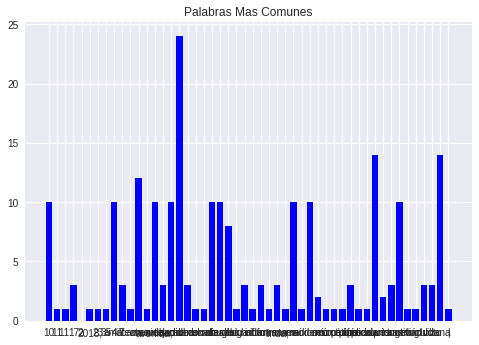

In [58]:
plt.bar(keys1.keys(), keys1.values(), color='b')
plt.title("Palabras Mas Comunes")

Text(0.5,1,'Palabras Mas Comunes')

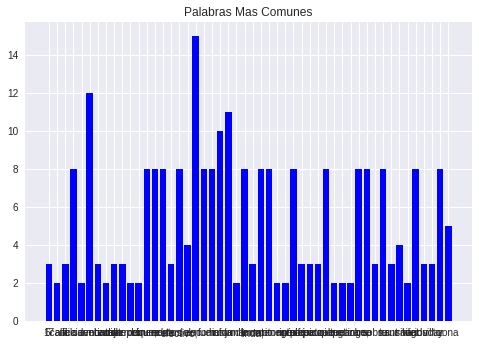

In [41]:
plt.bar(keys2.keys(), keys2.values(), color='b')
plt.title("Palabras Mas Comunes")

## Conclusiones Problema 2
Primero se puede observar que para #TraficoGTo, no se encuentran tweets y es porque ha estado inactivo desde 2016<br>
por lo cual se cambiará a #PrecaucionGT<br>
con lo que podemos observar que al ver las palabras más comunes: Dissel, Derramado, Carro averiado, villa nueva, zona "4 y 2"<br><br>

por lo cual se puede decir que las zonas 4 y 2 son las zonas con más alertas denunciadas, el aceite derramado es el mayor causante de las alertas así como carros averiados. <br><br><br>


Ahora viendo las palabras más comunes de TransitoGT <br>
Se observa que hay varios RT sobre Almicar Montejo, por lo cual es muy difícil hacer el análisis<br>

por lo cual se decide hacer un estudio de una lista de 50 palabras en la cual se encuentran las palabras: Villa linda, villa nueva, Carro averiado, Fallas, tráiler, periférico. <br><br>

por lo cual podemos discutir que la mayor influencia sobre accidentes o avisos es por carros averiados, fallas con tráiler, con villa nueva, villa linda y el periférico siendo las áreas más afectadas.


# Solucion problema 3

## Descarga de Informacion de Twitter
Se va a buscar twitts que tengan los hashtags #Worlds2018

In [83]:
query3 = t.search.tweets(q='%23Worlds2018')
for s3 in query3['statuses']:
    print(s3['created_at'], s3['text'], '\n')

Sun Oct 28 01:46:56 +0000 2018 RT @Cloud9: There are less than 8 hours left before the War of the West at #Worlds2018 and we need your energy! Help us form a C9 Spirit Bo… 

Sun Oct 28 01:46:46 +0000 2018 RT @redbullesports: Dear @Cloud9.

We don't ask for much, but today, we have to ask for a 3-0 #C9WIN tomorrow.

You know what? 3-2 #C9WIN i… 

Sun Oct 28 01:46:46 +0000 2018 RT @Cloud9: There are less than 8 hours left before the War of the West at #Worlds2018 and we need your energy! Help us form a C9 Spirit Bo… 

Sun Oct 28 01:46:39 +0000 2018 RT @Cloud9: Don't you ever just get the feeling that...

Tomorrow is gonna be exciting 😊? #Worlds2018 

Sun Oct 28 01:46:39 +0000 2018 RT @idleguide: We suspect the girls [MIGHT] be cosplaying for their performance, at World Championship Finals. Here’s a short clip of one o… 

Sun Oct 28 01:46:35 +0000 2018 RT @lolesports: DUNKED!

Take a closer look at how TheShy's Aatrox destroyed G2's health bars in game 3 of their #Worlds2018 Semifinal! ht

## Limpieza de datos

#### Volviendo Todo en Minuscula

In [0]:
for s3 in query3['statuses']:
  s3['text'] = s3['text'].lower()

#### Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.

In [0]:
for s3 in query3['statuses']:
  s3['text'] = re.sub(r"@", "", s3['text'])
  s3['text'] = re.sub(r"#", "", s3['text'])  
  s3['text'] = re.sub(r"\'", "", s3['text'])
  s3['text'] = re.sub(r"rt", "", s3['text'])
  s3['text'] = re.sub(r"worlds2018", "", s3['text'])

#### Quitar las url

In [0]:
for s3 in query3['statuses']:
  s3['text'] = re.sub(r"(http|ftp|https)[:A-Za-z//.0-9_]*$", "", s3['text']) 

#### Quitando Stopwords

In [0]:
for s3 in query3['statuses']:
  s3['text'] = ' '.join([word for word in s3['text'].split() if word not in stopwords.words('english')])

## Descubriendo Informacion
Se crea un diccionario con las palabras utilizadas y se van contando cuantas veces se repiten <br>

#### Diccionario

In [0]:
palabrasMasComunes3 = {}

for s3 in query3['statuses']:
  palabrasMasComunes3 = word_count(s3['text'], palabrasMasComunes3)

#### Palabras mas Comunes

In [109]:
for key in palabrasMasComunes3:
    print ("%s: %s" % (key, palabrasMasComunes3[key]))

cloud9:: 4
less: 2
8: 2
hours: 2
left: 2
war: 2
west: 2
need: 2
energy!: 2
help: 3
us: 2
form: 2
c9: 2
spirit: 2
bo…: 2
redbullespos:: 1
dear: 1
cloud9.: 1
dont: 2
ask: 2
much,: 1
today,: 1
3-0: 2
c9win: 3
tomorrow.: 1
know: 1
what?: 1
3-2: 1
i…: 1
ever: 1
get: 2
feeling: 1
that...: 1
tomorrow: 1
gonna: 1
exciting: 1
😊?: 1
idleguide:: 1
suspect: 1
girls: 1
[might]: 1
cosplaying: 1
performance,: 1
world: 2
championship: 1
finals.: 1
here’s: 1
sho: 1
clip: 1
one: 1
o…: 1
lolespos:: 3
dunked!: 2
take: 2
closer: 2
look: 2
theshys: 2
aatrox: 2
destroyed: 2
g2s: 2
health: 2
bars: 2
game: 2
3: 2
semifinal!: 2
htt…: 2
i’m: 2
rooting: 2
fncwin!: 1
suppo: 3
team: 3
predatorgaming: 2
&amp;: 2
stand: 2
chance: 2
win: 3
lol: 2
skins.…: 2
👟: 7
spam: 1
shoe: 1
g2: 1
bread,: 1
g2espos!: 1
westwin: 1
g2win: 1
c9win!: 1
fionnonfire:: 1
ig: 1
first: 1
non-uzi: 1
chinese: 1
make: 1
final: 1
big: 1
accomplishment: 1
official_ljl:: 1
【: 1
semi: 1
finals特集記事】: 1
「勝利まであと一歩」: 1
https://t.co/ywexud9cpx: 1
歴史の1ペ

###Ordenamos la ista de mayor a menor

In [110]:
palabrasOrdenadas3 = {}

for key, value in sorted(palabrasMasComunes3.items(), key=operator.itemgetter(1), reverse=True):
  palabrasOrdenadas3[key] = int(value)
  
print(palabrasOrdenadas3)

keys3 = keyInOrder(palabrasOrdenadas3, 10)


print (keys3)

{'👟': 7, 'cloud9:': 4, 'help': 3, 'c9win': 3, 'lolespos:': 3, 'suppo': 3, 'team': 3, 'win': 3, 'less': 2, '8': 2, 'hours': 2, 'left': 2, 'war': 2, 'west': 2, 'need': 2, 'energy!': 2, 'us': 2, 'form': 2, 'c9': 2, 'spirit': 2, 'bo…': 2, 'dont': 2, 'ask': 2, '3-0': 2, 'get': 2, 'world': 2, 'dunked!': 2, 'take': 2, 'closer': 2, 'look': 2, 'theshys': 2, 'aatrox': 2, 'destroyed': 2, 'g2s': 2, 'health': 2, 'bars': 2, 'game': 2, '3': 2, 'semifinal!': 2, 'htt…': 2, 'i’m': 2, 'rooting': 2, 'predatorgaming': 2, '&amp;': 2, 'stand': 2, 'chance': 2, 'lol': 2, 'skins.…': 2, 'redbullespos:': 1, 'dear': 1, 'cloud9.': 1, 'much,': 1, 'today,': 1, 'tomorrow.': 1, 'know': 1, 'what?': 1, '3-2': 1, 'i…': 1, 'ever': 1, 'feeling': 1, 'that...': 1, 'tomorrow': 1, 'gonna': 1, 'exciting': 1, '😊?': 1, 'idleguide:': 1, 'suspect': 1, 'girls': 1, '[might]': 1, 'cosplaying': 1, 'performance,': 1, 'championship': 1, 'finals.': 1, 'here’s': 1, 'sho': 1, 'clip': 1, 'one': 1, 'o…': 1, 'fncwin!': 1, 'spam': 1, 'shoe': 1, 

#### Representacion en Graficas

Text(0.5,1,'Palabras Mas Comunes')

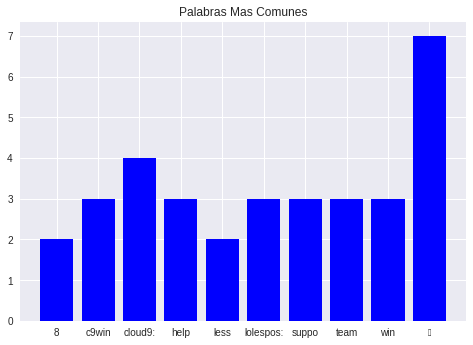

In [111]:
plt.bar(keys3.keys(), keys3.values(), color='b')
plt.title("Palabras Mas Comunes")

## Conclusiones Problema 3
Se puede observar que la mayoria de fans estan a favor de cloud9 que es un equipo que proviene de USA